# Image processing

## Imports

In [1]:
# Python standard library

# Scientific computing
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy.misc


## Import image

In [9]:
source_file_path = './source/clouds_0.jpg'
transformed_file_path = './source/clouds_0_transformed.png'

source = scipy.ndimage.imread(source_file_path)

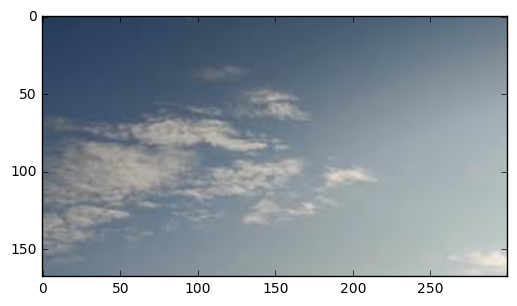

In [4]:
plt.imshow(source, cmap = 'gray')
plt.show()

## Image transformation

In [21]:
def PlotTransformedSource(transformed, source):
    fig, axes = plt.subplots(1, 2, figsize = (8,8))
    plt.sca(axes[0])
    plt.imshow(transformed)
    plt.sca(axes[1])
    plt.imshow(source)

    plt.show()
    

raw


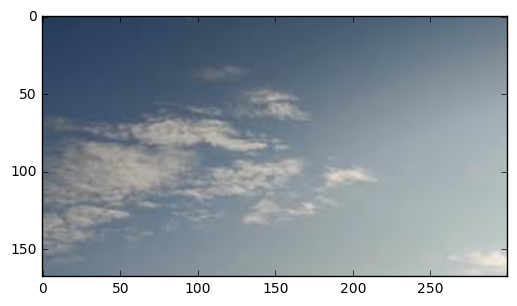

threshold (168, 240, 3)


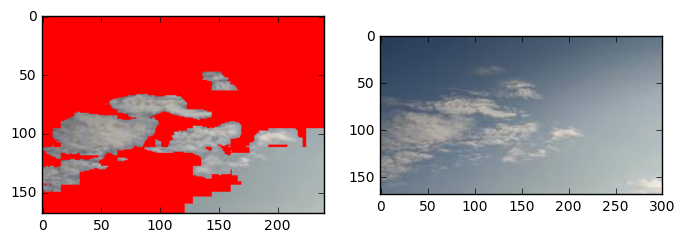

pixelize (40, 72, 3)


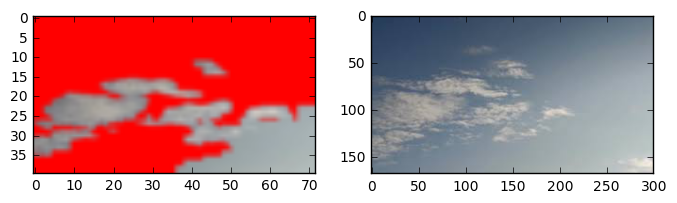

resize (40, 144, 3)


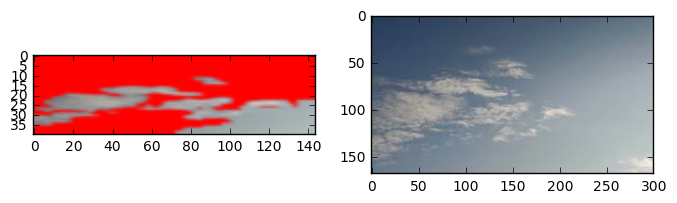

3.0 0.946391752577
threshold (40, 144, 3)


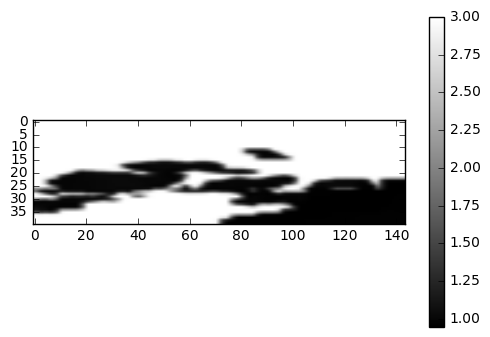

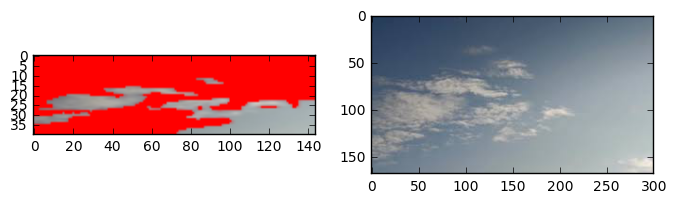

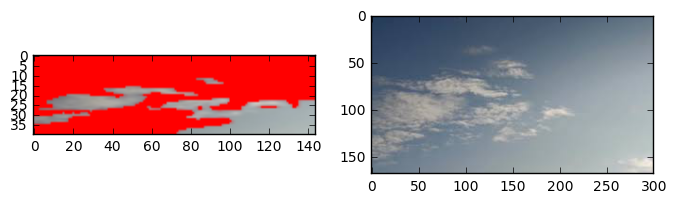

In [45]:
plot_all = True
save = True


# Raw
print 'raw'
plt.imshow(source)
plt.show()

if len(source.shape) == 3:
    source_type = 'rgb'
elif len(source.shape) == 2:
    source_type = 'gs'



# Copy
transformed = np.copy(source)

# Crop
x0 = 0
x1 = 240
y0 = 0
y1 = transformed.shape[0]
transformed = np.copy(transformed[y0:y1,x0:x1,:])


# Average
#transformed = np.mean(transformed, axis = 2)

# Crop
#transformed = np.copy(transformed[:,100:1100])



# Normalize
transformed = transformed / 255.

# Locally adjust intensity





# Gaussian blur
'''
transformed = scipy.ndimage.filters.gaussian_filter(transformed, sigma = 1)

if plot_all:
    print 'gaussian blur', transformed.shape
    plt.imshow(transformed, cmap = 'gray')
    plt.show()
'''    

    
# Threshold intensity
threshold = -.05
mask = [1.,0,0]
temp_transformed = -1*(transformed[:,:,2] - transformed[:,:,0])/np.sum(transformed[:,:,[0,2]], axis = 2)



transformed[temp_transformed < threshold,:] = mask

if plot_all:
    print 'threshold', transformed.shape
    PlotTransformedSource(transformed, source)



'''# Bin intensity
num_bins = 64
transformed = np.copy(transformed*num_bins)
transformed[(transformed > .05) & (transformed < 1)] = 1
transformed = np.copy(transformed.astype(dtype = np.uint8))
transformed = np.copy(transformed.astype(dtype = float)) / np.max(transformed)
if plot_all:
    print 'bin intensity', transformed.shape
    plt.imshow(transformed, cmap = 'gray')
    plt.show()'''




'''
# Colorize
temp = np.empty((transformed.shape[0], transformed.shape[1], 3))




if source_type == 'gs':
    temp[:,:,0] = np.copy(transformed)
    temp[:,:,1] = np.copy(transformed)
    temp[:,:,2] = np.copy(transformed)
    
elif source_type == 'rgb':
    temp = np.copy(transformed)
    

r = 147*2
g = 138*2
b = 152*2
temp[:,:,0] = temp[:,:,0]*r 
temp[:,:,1] = temp[:,:,1]*g
temp[:,:,2] = temp[:,:,2]*b

temp[temp > 255] = 255
temp[temp < 0] = 0


transformed = np.copy(temp.astype(np.uint8))

if plot_all:
    print 'colorize', transformed.shape
    PlotTransformedSource(transformed, source)
    
    
'''


# Pixelize
new_width = 72
new_height = int(1.*source.shape[0]/source.shape[1]*new_width)
transformed = np.copy(scipy.misc.imresize(transformed, (new_height, new_width)))

if plot_all:
    print 'pixelize', transformed.shape
    PlotTransformedSource(transformed, source)

    
# Change size
new_width = int(2.*transformed.shape[1])
new_height = int(transformed.shape[0])

transformed = np.copy(scipy.misc.imresize(transformed, (new_height, new_width)))

if plot_all:
    print 'resize', transformed.shape
    PlotTransformedSource(transformed, source)

    
    

    
# Threshold intensity

threshold = 1.25
mask = [255,0,0]
temp_transformed = 1.*(transformed[:,:,0])/np.mean(transformed[:,:,:], axis = 2)

plt.imshow(temp_transformed, cmap = 'gray')
plt.colorbar()

print np.max(temp_transformed), np.min(temp_transformed)

transformed[temp_transformed > threshold] = mask


if plot_all:
    print 'threshold', transformed.shape
    PlotTransformedSource(transformed, source)

    

    
    

PlotTransformedSource(transformed, source)


# Save
if save:
    scipy.misc.imsave(transformed_file_path, transformed)
    #plt.savefig(source_file_path.replace('.jpg', '_transformed.png'), dpi = 100)
    #transformed.tofile(source_file_path.replace('.jpg', '_transformed.csv'),  fmt = np.uint8, delimiter=',')

In [ ]:
plt.imshow(np.abs(source[:,:,2] - source[:,:,0]), cmap = 'gray')
plt.show()